In [1]:
from Model.DCVAE import MobileNetVae
from Model.Utils import LoadMPS100,PlotHistory,PlotDataAE
from keras.utils import to_categorical
from keras.optimizers import RMSprop,Adam
import numpy as np

Using TensorFlow backend.


In [2]:
x_train1,x_test1=LoadMPS100(dirBase='DataSet/MPS-100.mat',AllTrain=True);
x_train=to_categorical(x_train1,2)
x_test=to_categorical(x_test1,2)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

In [3]:
model = MobileNetVae(input_shape=(100,100,2),filters=[32,32,16],strides=[2,2,1],latent_dim=500,opt=RMSprop(lr=0.001),dropout=0.0)

In [4]:
model.fit(x_train, num_epochs=500,batch_size=64,val_split=0.2,verbose=1)

Setting up model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 2)  0                                            
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 50, 50, 64)   1152        input_1[0][0]                    
__________________________________________________________________________________________________
Conv_BN (BatchNormalization)    (None, 50, 50, 64)   256         Conv[0][0]                       
__________________________________________________________________________________________________
Conv_Relu6 (Activation)         (None, 50, 50, 64)   0           Conv_BN[0][0]                    
_________________________________________________________________________________________

Train on 32000 samples, validate on 8000 samples


Epoch 1/500


32000/32000 [==============================] - 187s 6ms/step - loss: 4911.9989 - acc_pred: 0.7558 - val_loss: 34469.5530 - val_acc_pred: 0.6657
Epoch 2/500


32000/32000 [==============================] - 180s 6ms/step - loss: 3448.8164 - acc_pred: 0.8543 - val_loss: 48008.4942 - val_acc_pred: 0.6707
Epoch 3/500


32000/32000 [==============================] - 178s 6ms/step - loss: 3011.2781 - acc_pred: 0.8795 - val_loss: 45214.5561 - val_acc_pred: 0.6709
Epoch 4/500


32000/32000 [==============================] - 178s 6ms/step - loss: 2796.7089 - acc_pred: 0.8909 - val_loss: 47476.1323 - val_acc_pred: 0.6715
Epoch 5/500


32000/32000 [==============================] - 177s 6ms/step - loss: 2640.5564 - acc_pred: 0.8987 - val_loss: 45287.4912 - val_acc_pred: 0.6759
Epoch 6/500


32000/32000 [==============================] - 177s 6ms/step - loss: 2498.4625 - acc_pred: 0.9056 - val_loss: 41788.2344 - val_acc_pred: 0.6771

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/500


32000/32000 [==============================] - 177s 6ms/step - loss: 2284.9409 - acc_pred: 0.9157 - val_loss: 26744.7024 - val_acc_pred: 0.7201
Epoch 8/500


32000/32000 [==============================] - 177s 6ms/step - loss: 2226.5160 - acc_pred: 0.9183 - val_loss: 16363.2620 - val_acc_pred: 0.7643
Epoch 9/500


32000/32000 [==============================] - 177s 6ms/step - loss: 2180.6323 - acc_pred: 0.9202 - val_loss: 13059.5671 - val_acc_pred: 0.7822
Epoch 10/500


32000/32000 [==============================] - 177s 6ms/step - loss: 2140.0520 - acc_pred: 0.9219 - val_loss: 9717.5530 - val_acc_pred: 0.8005
Epoch 11/500


32000/32000 [==============================] - 177s 6ms/step - loss: 2106.4342 - acc_pred: 0.9232 - val_loss: 8998.5588 - val_acc_pred: 0.8054
Epoch 12/500


32000/32000 [==============================] - 177s 6ms/step - loss: 2073.5985 - acc_pred: 0.9244 - val_loss: 8600.3882 - val_acc_pred: 0.8099
Epoch 13/500


32000/32000 [==============================] - 176s 6ms/step - loss: 2040.9831 - acc_pred: 0.9256 - val_loss: 8409.9294 - val_acc_pred: 0.8222
Epoch 14/500


32000/32000 [==============================] - 176s 6ms/step - loss: 2011.6911 - acc_pred: 0.9267 - val_loss: 7779.2878 - val_acc_pred: 0.8304
Epoch 15/500


32000/32000 [==============================] - 176s 6ms/step - loss: 1986.8606 - acc_pred: 0.9276 - val_loss: 8277.9526 - val_acc_pred: 0.8183
Epoch 16/500


32000/32000 [==============================] - 176s 6ms/step - loss: 1954.6434 - acc_pred: 0.9290 - val_loss: 6928.9154 - val_acc_pred: 0.8385
Epoch 17/500


32000/32000 [==============================] - 176s 6ms/step - loss: 1933.2047 - acc_pred: 0.9297 - val_loss: 6612.7425 - val_acc_pred: 0.8428
Epoch 18/500


32000/32000 [==============================] - 176s 6ms/step - loss: 1913.2291 - acc_pred: 0.9305 - val_loss: 7213.8300 - val_acc_pred: 0.8426
Epoch 19/500


32000/32000 [==============================] - 176s 6ms/step - loss: 1890.7042 - acc_pred: 0.9313 - val_loss: 6814.6543 - val_acc_pred: 0.8470
Epoch 20/500


32000/32000 [==============================] - 176s 6ms/step - loss: 1854.4042 - acc_pred: 0.9328 - val_loss: 4776.5399 - val_acc_pred: 0.8720
Epoch 21/500


32000/32000 [==============================] - 176s 6ms/step - loss: 1842.4263 - acc_pred: 0.9333 - val_loss: 4292.3704 - val_acc_pred: 0.8764
Epoch 22/500


32000/32000 [==============================] - 176s 6ms/step - loss: 1822.2296 - acc_pred: 0.9341 - val_loss: 3451.3232 - val_acc_pred: 0.8894
Epoch 23/500


32000/32000 [==============================] - 176s 6ms/step - loss: 1809.1930 - acc_pred: 0.9346 - val_loss: 4044.1769 - val_acc_pred: 0.8784
Epoch 24/500


32000/32000 [==============================] - 176s 6ms/step - loss: 1796.5728 - acc_pred: 0.9351 - val_loss: 3553.1385 - val_acc_pred: 0.8874
Epoch 25/500


32000/32000 [==============================] - 176s 5ms/step - loss: 1786.8077 - acc_pred: 0.9354 - val_loss: 3179.0852 - val_acc_pred: 0.8956
Epoch 26/500


32000/32000 [==============================] - 176s 5ms/step - loss: 1774.9712 - acc_pred: 0.9359 - val_loss: 3480.9421 - val_acc_pred: 0.8891
Epoch 27/500


32000/32000 [==============================] - 176s 5ms/step - loss: 1763.9354 - acc_pred: 0.9363 - val_loss: 3391.0775 - val_acc_pred: 0.8933
Epoch 28/500


32000/32000 [==============================] - 176s 5ms/step - loss: 1754.4861 - acc_pred: 0.9367 - val_loss: 3462.5785 - val_acc_pred: 0.8934
Epoch 29/500


32000/32000 [==============================] - 176s 5ms/step - loss: 1746.3635 - acc_pred: 0.9369 - val_loss: 4232.4137 - val_acc_pred: 0.8776
Epoch 30/500


32000/32000 [==============================] - 176s 5ms/step - loss: 1733.8055 - acc_pred: 0.9374 - val_loss: 3626.9255 - val_acc_pred: 0.8901

Epoch 00030: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 31/500


32000/32000 [==============================] - 176s 5ms/step - loss: 1696.0588 - acc_pred: 0.9391 - val_loss: 2841.4669 - val_acc_pred: 0.9052
Epoch 32/500


32000/32000 [==============================] - 176s 5ms/step - loss: 1693.2313 - acc_pred: 0.9392 - val_loss: 2161.0206 - val_acc_pred: 0.9237
Epoch 33/500


32000/32000 [==============================] - 176s 5ms/step - loss: 1685.3583 - acc_pred: 0.9395 - val_loss: 2014.6620 - val_acc_pred: 0.9275
Epoch 34/500


32000/32000 [==============================] - 177s 6ms/step - loss: 1678.2732 - acc_pred: 0.9398 - val_loss: 1934.1592 - val_acc_pred: 0.9295
Epoch 35/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1672.3702 - acc_pred: 0.9400 - val_loss: 1996.1580 - val_acc_pred: 0.9276
Epoch 36/500


32000/32000 [==============================] - 176s 5ms/step - loss: 1665.5590 - acc_pred: 0.9403 - val_loss: 1949.4349 - val_acc_pred: 0.9284
Epoch 37/500


32000/32000 [==============================] - 176s 5ms/step - loss: 1664.8784 - acc_pred: 0.9403 - val_loss: 1949.3788 - val_acc_pred: 0.9298
Epoch 38/500


32000/32000 [==============================] - 176s 5ms/step - loss: 1660.2787 - acc_pred: 0.9405 - val_loss: 2008.3073 - val_acc_pred: 0.9290
Epoch 39/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1653.1120 - acc_pred: 0.9408 - val_loss: 2018.3496 - val_acc_pred: 0.9280

Epoch 00039: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 40/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1640.8073 - acc_pred: 0.9413 - val_loss: 1762.1855 - val_acc_pred: 0.9364
Epoch 41/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1633.7673 - acc_pred: 0.9416 - val_loss: 1669.4428 - val_acc_pred: 0.9403
Epoch 42/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1633.2950 - acc_pred: 0.9417 - val_loss: 1678.0496 - val_acc_pred: 0.9398
Epoch 43/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1626.4241 - acc_pred: 0.9419 - val_loss: 1665.8619 - val_acc_pred: 0.9409
Epoch 44/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1628.0085 - acc_pred: 0.9419 - val_loss: 1685.2379 - val_acc_pred: 0.9404
Epoch 45/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1626.8763 - acc_pred: 0.9419 - val_loss: 1624.0658 - val_acc_pred: 0.9421
Epoch 46/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1621.9107 - acc_pred: 0.9422 - val_loss: 1678.1801 - val_acc_pred: 0.9402
Epoch 47/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1622.3358 - acc_pred: 0.9421 - val_loss: 1655.7538 - val_acc_pred: 0.9407
Epoch 48/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1620.2034 - acc_pred: 0.9422 - val_loss: 1660.2887 - val_acc_pred: 0.9412
Epoch 49/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1618.5907 - acc_pred: 0.9423 - val_loss: 1679.7876 - val_acc_pred: 0.9401
Epoch 50/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1614.5572 - acc_pred: 0.9425 - val_loss: 1739.2356 - val_acc_pred: 0.9371

Epoch 00050: ReduceLROnPlateau reducing learning rate to 4.0000002627493814e-05.
Epoch 51/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1609.2474 - acc_pred: 0.9427 - val_loss: 1628.1317 - val_acc_pred: 0.9421
Epoch 52/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1608.0907 - acc_pred: 0.9428 - val_loss: 1591.6972 - val_acc_pred: 0.9439
Epoch 53/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1605.0032 - acc_pred: 0.9429 - val_loss: 1576.5191 - val_acc_pred: 0.9444
Epoch 54/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1605.5144 - acc_pred: 0.9428 - val_loss: 1586.5714 - val_acc_pred: 0.9439
Epoch 55/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1604.9404 - acc_pred: 0.9429 - val_loss: 1575.0013 - val_acc_pred: 0.9441
Epoch 56/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1604.2202 - acc_pred: 0.9429 - val_loss: 1574.5379 - val_acc_pred: 0.9450
Epoch 57/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1604.7952 - acc_pred: 0.9429 - val_loss: 1561.8795 - val_acc_pred: 0.9454
Epoch 58/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1602.9848 - acc_pred: 0.9430 - val_loss: 1575.2875 - val_acc_pred: 0.9443
Epoch 59/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1603.3989 - acc_pred: 0.9429 - val_loss: 1572.8908 - val_acc_pred: 0.9447
Epoch 60/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1599.4251 - acc_pred: 0.9431 - val_loss: 1556.0548 - val_acc_pred: 0.9452
Epoch 61/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1599.3880 - acc_pred: 0.9431 - val_loss: 1539.6225 - val_acc_pred: 0.9460
Epoch 62/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1597.8787 - acc_pred: 0.9432 - val_loss: 1553.9988 - val_acc_pred: 0.9456
Epoch 63/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1598.0863 - acc_pred: 0.9432 - val_loss: 1546.9997 - val_acc_pred: 0.9460
Epoch 64/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1597.1582 - acc_pred: 0.9432 - val_loss: 1561.3199 - val_acc_pred: 0.9449
Epoch 65/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1596.5235 - acc_pred: 0.9432 - val_loss: 1543.6142 - val_acc_pred: 0.9455
Epoch 66/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1594.8221 - acc_pred: 0.9433 - val_loss: 1554.7849 - val_acc_pred: 0.9457

Epoch 00066: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-05.
Epoch 67/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1592.7078 - acc_pred: 0.9434 - val_loss: 1521.8827 - val_acc_pred: 0.9472
Epoch 68/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1592.7225 - acc_pred: 0.9434 - val_loss: 1520.5128 - val_acc_pred: 0.9468
Epoch 69/500


32000/32000 [==============================] - 175s 5ms/step - loss: 1593.0700 - acc_pred: 0.9434 - val_loss: 1526.2684 - val_acc_pred: 0.9469
Epoch 70/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1594.3162 - acc_pred: 0.9433 - val_loss: 1520.0306 - val_acc_pred: 0.9472
Epoch 71/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1592.2123 - acc_pred: 0.9434 - val_loss: 1517.7113 - val_acc_pred: 0.9472
Epoch 72/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1590.3905 - acc_pred: 0.9435 - val_loss: 1516.4191 - val_acc_pred: 0.9469
Epoch 73/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1588.8314 - acc_pred: 0.9435 - val_loss: 1516.5284 - val_acc_pred: 0.9470
Epoch 74/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1591.8684 - acc_pred: 0.9434 - val_loss: 1514.4786 - val_acc_pred: 0.9473
Epoch 75/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1593.2831 - acc_pred: 0.9434 - val_loss: 1517.8439 - val_acc_pred: 0.9470
Epoch 76/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1589.9232 - acc_pred: 0.9435 - val_loss: 1517.2082 - val_acc_pred: 0.9470
Epoch 77/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1591.2579 - acc_pred: 0.9434 - val_loss: 1517.5320 - val_acc_pred: 0.9469
Epoch 78/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1589.0895 - acc_pred: 0.9435 - val_loss: 1518.4267 - val_acc_pred: 0.9469
Epoch 79/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1588.2504 - acc_pred: 0.9436 - val_loss: 1518.2270 - val_acc_pred: 0.9468

Epoch 00079: ReduceLROnPlateau reducing learning rate to 8.000000889296643e-06.
Epoch 80/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1590.3487 - acc_pred: 0.9435 - val_loss: 1505.8658 - val_acc_pred: 0.9475
Epoch 81/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1588.1336 - acc_pred: 0.9436 - val_loss: 1505.4879 - val_acc_pred: 0.9476
Epoch 82/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1588.1211 - acc_pred: 0.9436 - val_loss: 1503.6275 - val_acc_pred: 0.9478
Epoch 83/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1589.0020 - acc_pred: 0.9435 - val_loss: 1501.7781 - val_acc_pred: 0.9478
Epoch 84/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1587.4938 - acc_pred: 0.9436 - val_loss: 1503.3487 - val_acc_pred: 0.9479
Epoch 85/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1587.2134 - acc_pred: 0.9436 - val_loss: 1503.1638 - val_acc_pred: 0.9478
Epoch 86/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1584.5116 - acc_pred: 0.9437 - val_loss: 1504.2224 - val_acc_pred: 0.9479
Epoch 87/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1585.0694 - acc_pred: 0.9437 - val_loss: 1503.9196 - val_acc_pred: 0.9478
Epoch 88/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.6160 - acc_pred: 0.9436 - val_loss: 1503.4279 - val_acc_pred: 0.9478

Epoch 00088: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-06.
Epoch 89/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.3541 - acc_pred: 0.9436 - val_loss: 1500.5994 - val_acc_pred: 0.9478
Epoch 90/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.6600 - acc_pred: 0.9436 - val_loss: 1499.2611 - val_acc_pred: 0.9479
Epoch 91/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1587.0530 - acc_pred: 0.9436 - val_loss: 1498.3458 - val_acc_pred: 0.9480
Epoch 92/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1587.6202 - acc_pred: 0.9436 - val_loss: 1498.9541 - val_acc_pred: 0.9479
Epoch 93/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.8949 - acc_pred: 0.9436 - val_loss: 1499.4198 - val_acc_pred: 0.9478
Epoch 94/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.3821 - acc_pred: 0.9436 - val_loss: 1497.8754 - val_acc_pred: 0.9479
Epoch 95/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.6210 - acc_pred: 0.9436 - val_loss: 1498.7099 - val_acc_pred: 0.9479
Epoch 96/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.6741 - acc_pred: 0.9436 - val_loss: 1498.9773 - val_acc_pred: 0.9479
Epoch 97/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.7368 - acc_pred: 0.9436 - val_loss: 1498.7416 - val_acc_pred: 0.9480
Epoch 98/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1587.6700 - acc_pred: 0.9436 - val_loss: 1498.8971 - val_acc_pred: 0.9479
Epoch 99/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1587.8785 - acc_pred: 0.9436 - val_loss: 1498.9905 - val_acc_pred: 0.9479

Epoch 00099: ReduceLROnPlateau reducing learning rate to 1.6000001323845936e-06.
Epoch 100/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1585.6194 - acc_pred: 0.9437 - val_loss: 1497.8693 - val_acc_pred: 0.9480
Epoch 101/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.6412 - acc_pred: 0.9436 - val_loss: 1497.1264 - val_acc_pred: 0.9480
Epoch 102/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.6056 - acc_pred: 0.9436 - val_loss: 1496.8567 - val_acc_pred: 0.9480
Epoch 103/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1587.1756 - acc_pred: 0.9436 - val_loss: 1496.9209 - val_acc_pred: 0.9480
Epoch 104/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1587.7215 - acc_pred: 0.9436 - val_loss: 1496.8013 - val_acc_pred: 0.9479
Epoch 105/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1585.2310 - acc_pred: 0.9437 - val_loss: 1496.9037 - val_acc_pred: 0.9479
Epoch 106/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.3843 - acc_pred: 0.9436 - val_loss: 1497.0202 - val_acc_pred: 0.9480
Epoch 107/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1582.5990 - acc_pred: 0.9438 - val_loss: 1497.0875 - val_acc_pred: 0.9479
Epoch 108/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1589.8668 - acc_pred: 0.9435 - val_loss: 1497.4479 - val_acc_pred: 0.9479
Epoch 109/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.4247 - acc_pred: 0.9436 - val_loss: 1497.0923 - val_acc_pred: 0.9480

Epoch 00109: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-07.
Epoch 110/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1588.3355 - acc_pred: 0.9436 - val_loss: 1497.2462 - val_acc_pred: 0.9480
Epoch 111/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1584.3123 - acc_pred: 0.9437 - val_loss: 1496.6693 - val_acc_pred: 0.9480
Epoch 112/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.5551 - acc_pred: 0.9436 - val_loss: 1496.4458 - val_acc_pred: 0.9480
Epoch 113/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.5777 - acc_pred: 0.9436 - val_loss: 1496.5788 - val_acc_pred: 0.9480
Epoch 114/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1587.9152 - acc_pred: 0.9436 - val_loss: 1496.6072 - val_acc_pred: 0.9480
Epoch 115/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1588.0401 - acc_pred: 0.9436 - val_loss: 1496.6228 - val_acc_pred: 0.9480
Epoch 116/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.1274 - acc_pred: 0.9437 - val_loss: 1497.0285 - val_acc_pred: 0.9480
Epoch 117/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1584.4307 - acc_pred: 0.9437 - val_loss: 1496.2925 - val_acc_pred: 0.9480
Epoch 118/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1583.1651 - acc_pred: 0.9438 - val_loss: 1496.6602 - val_acc_pred: 0.9480
Epoch 119/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.6608 - acc_pred: 0.9436 - val_loss: 1496.7018 - val_acc_pred: 0.9480
Epoch 120/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.1431 - acc_pred: 0.9437 - val_loss: 1496.5084 - val_acc_pred: 0.9480
Epoch 121/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1584.7477 - acc_pred: 0.9437 - val_loss: 1496.4762 - val_acc_pred: 0.9480
Epoch 122/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1585.7146 - acc_pred: 0.9437 - val_loss: 1496.2081 - val_acc_pred: 0.9480
Epoch 123/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1584.6438 - acc_pred: 0.9437 - val_loss: 1496.6592 - val_acc_pred: 0.9480
Epoch 124/500


32000/32000 [==============================] - 173s 5ms/step - loss: 1586.6176 - acc_pred: 0.9436 - val_loss: 1496.2785 - val_acc_pred: 0.9480
Epoch 125/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1588.1393 - acc_pred: 0.9436 - val_loss: 1496.0682 - val_acc_pred: 0.9480
Epoch 126/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1585.9461 - acc_pred: 0.9437 - val_loss: 1496.3882 - val_acc_pred: 0.9480
Epoch 127/500


32000/32000 [==============================] - 173s 5ms/step - loss: 1586.0404 - acc_pred: 0.9437 - val_loss: 1496.1355 - val_acc_pred: 0.9480
Epoch 128/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1583.8903 - acc_pred: 0.9437 - val_loss: 1496.7788 - val_acc_pred: 0.9480
Epoch 129/500


32000/32000 [==============================] - 173s 5ms/step - loss: 1583.8604 - acc_pred: 0.9438 - val_loss: 1496.6597 - val_acc_pred: 0.9480
Epoch 130/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1588.3622 - acc_pred: 0.9436 - val_loss: 1496.4697 - val_acc_pred: 0.9480

Epoch 00130: ReduceLROnPlateau reducing learning rate to 5e-07.
Epoch 131/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1585.1595 - acc_pred: 0.9437 - val_loss: 1496.0106 - val_acc_pred: 0.9480
Epoch 132/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.8023 - acc_pred: 0.9436 - val_loss: 1496.8909 - val_acc_pred: 0.9480
Epoch 133/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.2059 - acc_pred: 0.9437 - val_loss: 1496.0784 - val_acc_pred: 0.9480
Epoch 134/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1585.8487 - acc_pred: 0.9437 - val_loss: 1496.2448 - val_acc_pred: 0.9480
Epoch 135/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1583.8332 - acc_pred: 0.9438 - val_loss: 1495.6925 - val_acc_pred: 0.9480
Epoch 136/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1586.6330 - acc_pred: 0.9436 - val_loss: 1496.4909 - val_acc_pred: 0.9480
Epoch 137/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1585.0915 - acc_pred: 0.9437 - val_loss: 1496.2854 - val_acc_pred: 0.9480
Epoch 138/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1587.7972 - acc_pred: 0.9436 - val_loss: 1496.1033 - val_acc_pred: 0.9480
Epoch 139/500


32000/32000 [==============================] - 173s 5ms/step - loss: 1585.3888 - acc_pred: 0.9437 - val_loss: 1496.3988 - val_acc_pred: 0.9480
Epoch 140/500


32000/32000 [==============================] - 173s 5ms/step - loss: 1582.0692 - acc_pred: 0.9438 - val_loss: 1496.1675 - val_acc_pred: 0.9480
Epoch 141/500


32000/32000 [==============================] - 173s 5ms/step - loss: 1587.4163 - acc_pred: 0.9436 - val_loss: 1496.3643 - val_acc_pred: 0.9480
Epoch 142/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1584.2316 - acc_pred: 0.9437 - val_loss: 1496.0220 - val_acc_pred: 0.9480
Epoch 143/500


32000/32000 [==============================] - 173s 5ms/step - loss: 1584.2447 - acc_pred: 0.9437 - val_loss: 1495.6397 - val_acc_pred: 0.9480
Epoch 144/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1589.7850 - acc_pred: 0.9435 - val_loss: 1496.7637 - val_acc_pred: 0.9480
Epoch 145/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1585.5016 - acc_pred: 0.9437 - val_loss: 1496.3659 - val_acc_pred: 0.9480
Epoch 146/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1585.3158 - acc_pred: 0.9437 - val_loss: 1495.8942 - val_acc_pred: 0.9480
Epoch 147/500


32000/32000 [==============================] - 173s 5ms/step - loss: 1584.3634 - acc_pred: 0.9437 - val_loss: 1496.4528 - val_acc_pred: 0.9480
Epoch 148/500


32000/32000 [==============================] - 174s 5ms/step - loss: 1585.6785 - acc_pred: 0.9437 - val_loss: 1496.4940 - val_acc_pred: 0.9480
Epoch 149/500


32000/32000 [==============================] - 173s 5ms/step - loss: 1586.9080 - acc_pred: 0.9436 - val_loss: 1496.4049 - val_acc_pred: 0.9480
Epoch 150/500


32000/32000 [==============================] - 173s 5ms/step - loss: 1587.2804 - acc_pred: 0.9436 - val_loss: 1496.1865 - val_acc_pred: 0.9480
Epoch 151/500


32000/32000 [==============================] - 173s 5ms/step - loss: 1587.7250 - acc_pred: 0.9436 - val_loss: 1495.9935 - val_acc_pred: 0.9480
Epoch 152/500


32000/32000 [==============================] - 173s 5ms/step - loss: 1586.6766 - acc_pred: 0.9436 - val_loss: 1496.1075 - val_acc_pred: 0.9480
Epoch 153/500


32000/32000 [==============================] - 173s 5ms/step - loss: 1585.8081 - acc_pred: 0.9437 - val_loss: 1496.2044 - val_acc_pred: 0.9480



val_loss   :  [1496.404857421875, 1496.1865107421875, 1495.9934560546876, 1496.107470703125]
loss   :  [1586.9080231933594, 1587.280369140625, 1587.7250419921875, 1586.6765893554686]


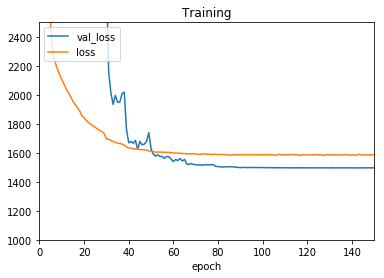

In [11]:
PlotHistory(model.history.history,listKeys=['val_loss','loss'],axis_=[0,150,1000,2500]) 

lr   :  [4e-07, 4e-07, 4e-07, 4e-07]


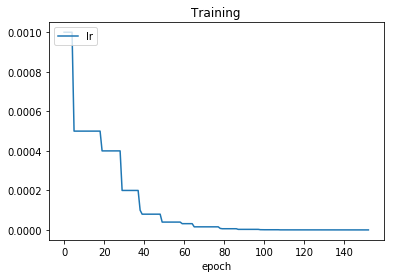

In [6]:
PlotHistory(model.history.history,listKeys=['lr'])

val_acc_pred   :  [0.947997887134552, 0.948030424118042, 0.9480316505432129, 0.9479965443611145]
acc_pred   :  [0.9436018588542938, 0.943600443482399, 0.9435755369663239, 0.9436375938653946]


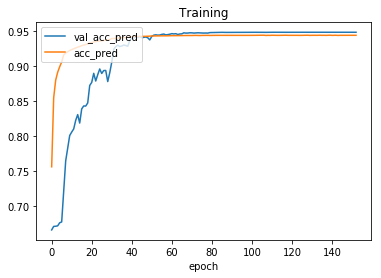

In [7]:
PlotHistory(model.history.history,listKeys=['val_acc_pred','acc_pred'])

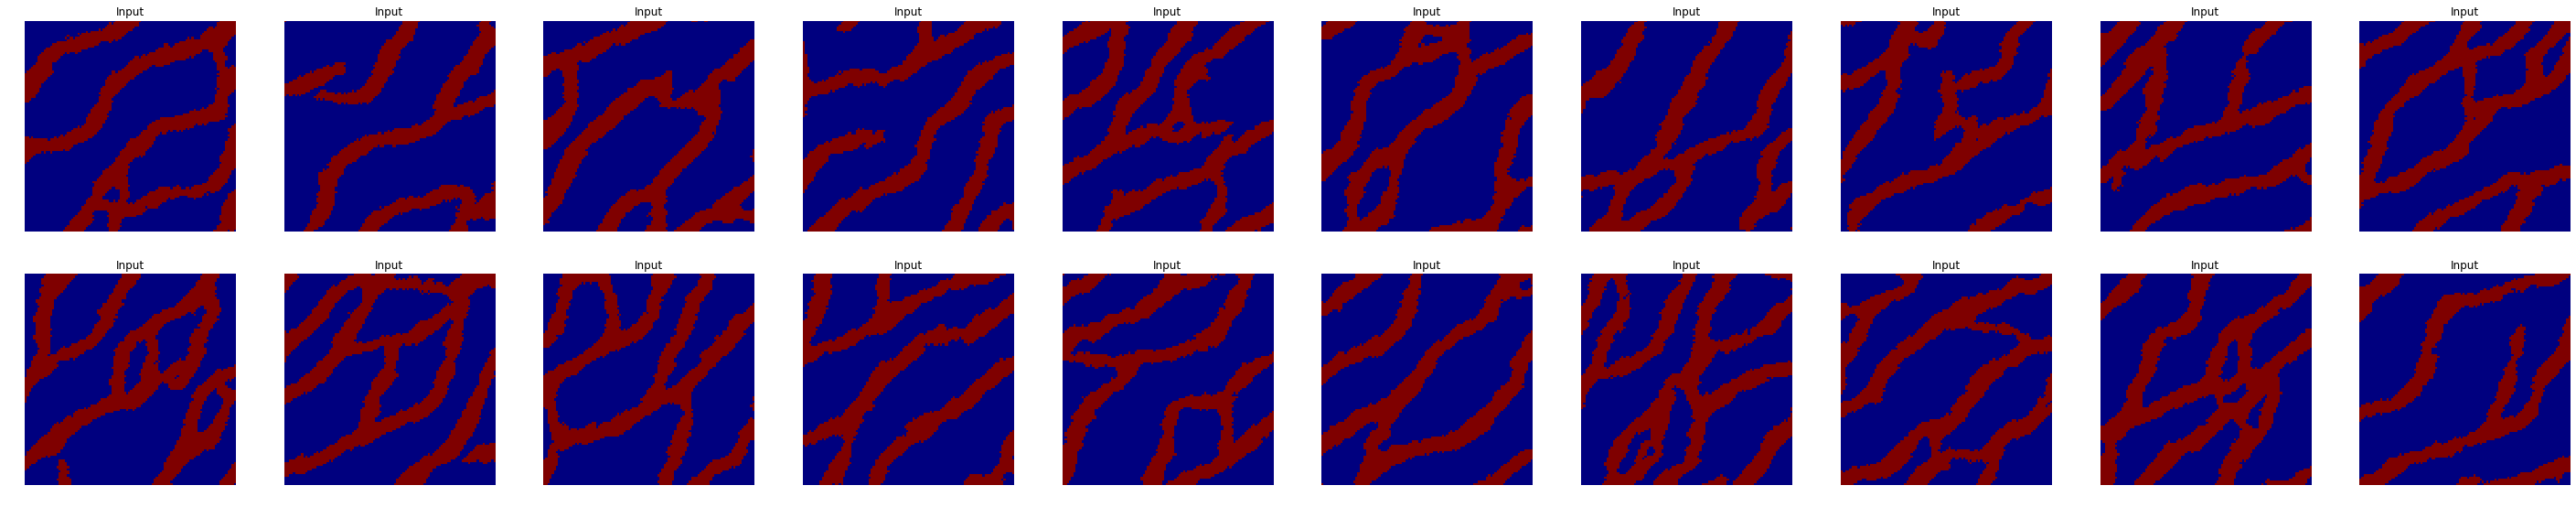

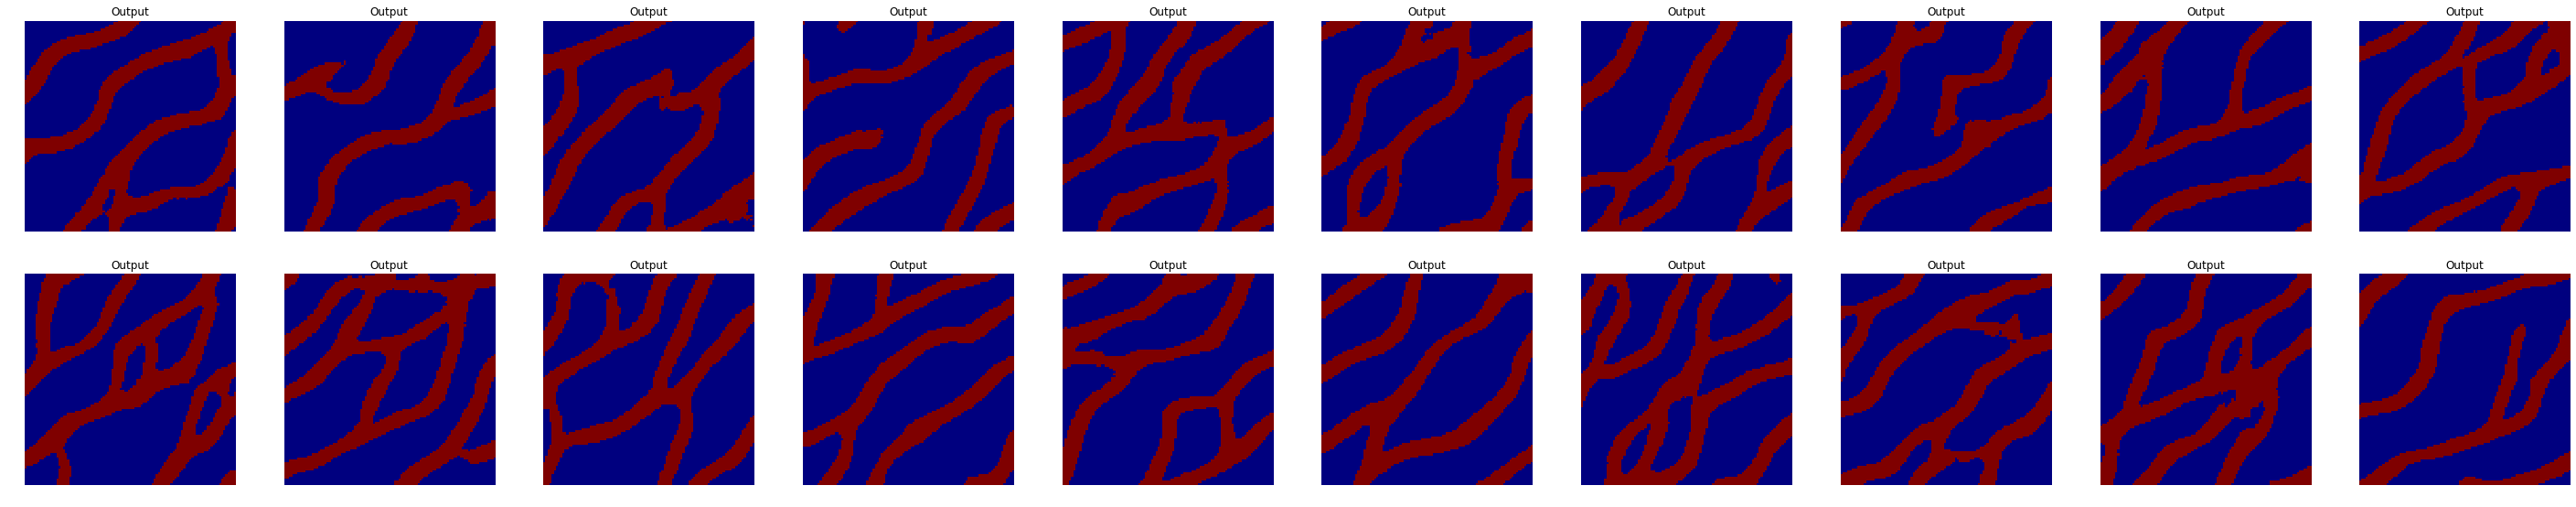

In [12]:
x_rec=model.model.predict(x_test)
PlotDataAE(x_test[:,:,:,1],np.argmax(x_rec[:,:,:,:],axis=-1),digit_size=100)

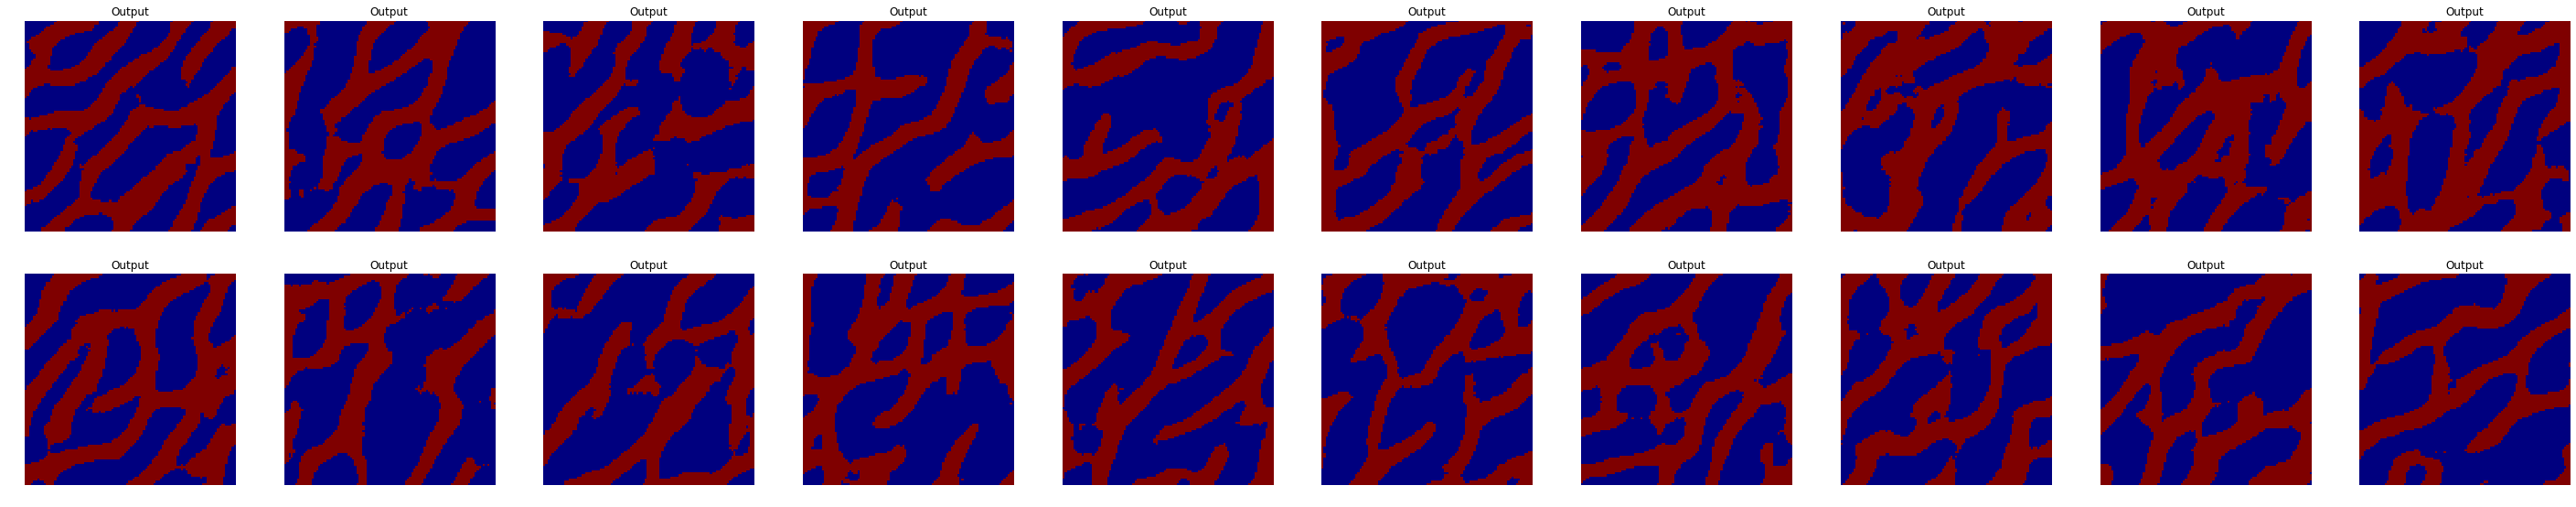

In [13]:
x_gen=model.generate(binary=True)
PlotDataAE([],x_gen[:,:,:],digit_size=100,Only_Result=False)